In [1]:
import sympy as sym

In [2]:
c, a, wealth, utility = sym.symbols("c a w u", real=True, positive=True)
CRRA, WealthShare, WealthShift = sym.symbols(
    "sigma delta  \\underline{a}", real=True, positive=True
)
vp_a = sym.symbols("v_a", real=True, positive=True)
chi = sym.Symbol("chi", real=True, positive=True)

In [3]:
w = a + WealthShift
w

\underline{a} + a

In [4]:
u = (c ** (1 - WealthShare) * w**WealthShare) ** (1 - CRRA) / (1 - CRRA)
u

(c**(1 - delta)*(\underline{a} + a)**delta)**(1 - sigma)/(1 - sigma)

In [5]:
u_alt = u.replace(w, wealth)
u_alt

(c**(1 - delta)*w**delta)**(1 - sigma)/(1 - sigma)

In [6]:
dudc = sym.diff(u, c)
dudc.cancel().subs(chi, c * (a + WealthShift) ** (-1))

(-c**(delta*sigma - delta - sigma + 1)*delta*(\underline{a} + a)**(-delta*sigma + delta) + c**(delta*sigma - delta - sigma + 1)*(\underline{a} + a)**(-delta*sigma + delta))/c

In [7]:
dudw = u.replace(w, wealth).diff(wealth)
dudw.simplify()

delta*(c**(1 - delta)*w**delta)**(1 - sigma)/w

In [8]:
duda = sym.diff(u, a)
duda.replace(w, wealth)

c**(1 - delta)*c**(delta - 1)*delta*(c**(1 - delta)*w**delta)**(1 - sigma)/w

In [9]:
half_euler = ((dudc - duda).cancel().simplify()) ** (-1 / CRRA)
half_euler.subs(chi, c / a)

(c**(delta*sigma - delta - sigma)*(\underline{a} + a)**(-delta*sigma + delta - 1)*(-\underline{a}*delta + \underline{a} - a*delta + a - c*delta))**(-1/sigma)

In [10]:
sym.limit(half_euler, a, 0)

(\underline{a}**(-delta*sigma + delta - 1)*c**(delta*sigma - delta - sigma)*(-\underline{a}*delta + \underline{a} - c*delta))**(-1/sigma)

In [11]:
dudcdc = sym.diff(dudc.replace(w, wealth), c)
dudcdc.simplify().cancel().simplify()

c**(delta*sigma - delta - sigma - 1)*w**(delta*(1 - sigma))*(-delta**2*sigma + delta**2 + 2*delta*sigma - delta - sigma)

In [12]:
dudadc = sym.diff(duda.replace(w, wealth), c)
dudadc.simplify().cancel().simplify()

c**(delta*sigma - delta - sigma)*delta*w**(delta*(1 - sigma) - 1)*(delta*sigma - delta - sigma + 1)

In [13]:
euler = dudc - duda
euler

-c**(1 - delta)*c**(delta - 1)*delta*(c**(1 - delta)*(\underline{a} + a)**delta)**(1 - sigma)/(\underline{a} + a) + c**(1 - delta)*c**(delta - 1)*(c**(1 - delta)*(\underline{a} + a)**delta)**(1 - sigma)*(1 - delta)/c

In [14]:
chi, delta, rho = sym.symbols("chi delta rho", real=True, positive=True)
zeta = sym.symbols("zeta", real=True, positive=True)

In [15]:
chi_func = chi ** (1 - delta) * (
    (1 - delta) * chi ** (-delta) - delta * chi ** (1 - delta)
) ** (-1 / rho)
chi_func = sym.log(chi_func)
# chi_func = chi_func.subs(chi, (1 - delta) / delta * sym.exp(zeta) / (1 + sym.exp(zeta)))
chi_func

log(chi**(1 - delta)/(-chi**(1 - delta)*delta + (1 - delta)/chi**delta)**(1/rho))

In [16]:
sym.limit(chi_func, chi, (1 - delta) / delta)

Limit(log(chi**(1 - delta)/(-chi**(1 - delta)*delta + (1 - delta)/chi**delta)**(1/rho)), chi, (1 - delta)/delta, dir='+')

<string>:1: RuntimeWarning: invalid value encountered in scalar power


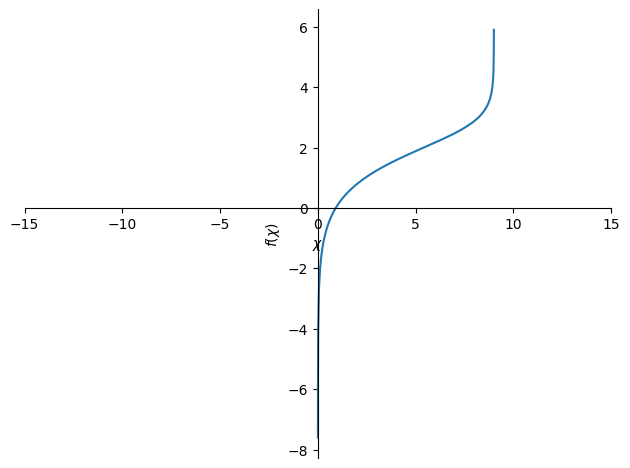

In [17]:
delta_sub = 0.1
sym.plot(chi_func.subs({delta: delta_sub, rho: 2.5}), xlim=(-15, 15))

In [18]:
chi_inner = (1 - delta) * chi ** (-delta) - delta * chi ** (1 - delta)

chi_inner

-chi**(1 - delta)*delta + (1 - delta)/chi**delta

In [19]:
sym.solve(chi_inner, chi)

[(1 - delta)/delta]

In [20]:
chi_alt = chi ** (delta - 1) * (
    (1 - delta) * chi**delta - delta * chi ** (delta - 1)
) ** (-1 / rho)
chi_alt = chi_alt

<string>:1: RuntimeWarning: invalid value encountered in scalar power


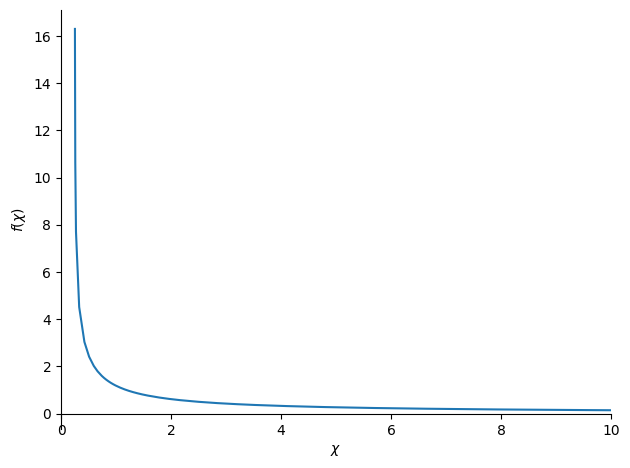

In [21]:
delta_sub = 0.2
sym.plot(
    chi_alt.subs({delta: delta_sub, rho: 3}),
    xlim=(0, 10),
)

In [22]:
chi_alt_inner = (1 - delta) * chi**delta - delta * chi ** (delta - 1)
chi_alt_inner

chi**delta*(1 - delta) - chi**(delta - 1)*delta

In [23]:
sym.solve(chi_alt_inner, chi)

[-delta/(delta - 1)]